In [144]:
import matplotlib.pyplot as plt
import numpy as np
import math
import json

In [84]:
# Cons values
PROBES    = 500
TIME      = 1


def make_sin(frequency, amp, trans):
    # Generates sin wave

    # frequency - Frequency Hz
    # amp - Amplitude m
    # trans - wave shift
    # probes - probes per second
    # time - total wave fime
    
    keys      = np.arange(0, TIME, 1.0 / PROBES) * 2 * math.pi * frequency + trans
    values    = [math.sin(x) * amp for x in keys]

    return values

def merge_waves(waves_list):
    # Creates single wave from multiple waves
    num_of_waves = len(waves_list)
    waves_lenght = len(waves_list[0])
    
    wave = [0] * waves_lenght
    
    for probe in range(waves_lenght):
        wave[probe] = sum([x[probe] for x in waves_list])
        
    return wave

def draw_waves(time, waves_list):
    args = []

    for wave in waves_list:
        args.append(time)
        args.append(wave)
    
    plt.plot(*args)
    plt.ylabel('Sin value')
    plt.show()


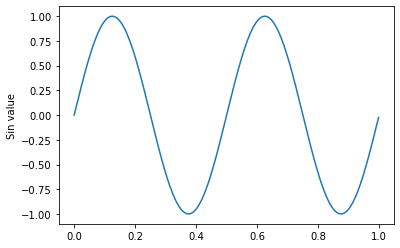

In [149]:
time      = np.arange(0, TIME, 1.0 / PROBES)

waves = []
waves.append(make_sin(2, 1, 0))

draw_waves(time, waves)



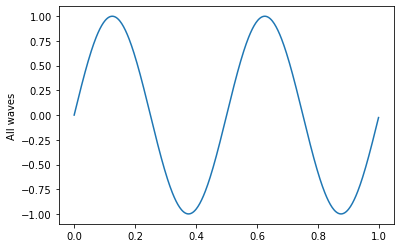

In [150]:
merged = merge_waves(waves)

plt.plot(time, merged)
plt.ylabel('All waves')
plt.show()

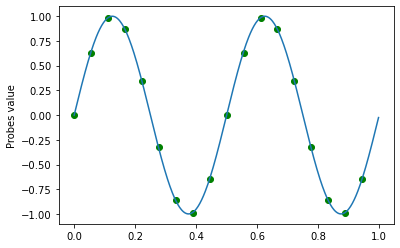

In [151]:
# Probing

PROBE_FREQ = 18 # Hz

probed_time  = np.arange(0, TIME, 1.0 / PROBE_FREQ)
probed_value = [merged[math.floor(x * PROBES)] for x in probed_time]

plt.plot(probed_time, probed_value, 'go', time, merged)
plt.ylabel('Probes value')
plt.show()

In [152]:
# Fourier transform

fourier = {}

for k in range(1, math.ceil(PROBE_FREQ * TIME / 2)):

    sum_real = 0
    sum_imaginary = 0
    total_probed = len(probed_value)

    for n in range(total_probed):
        b = 2.0 * math.pi * k * n / total_probed
        real = probed_value[n] * math.cos(-b)
        imaginary = probed_value[n] * math.sin(-b)
        sum_real      += real 
        sum_imaginary += imaginary

    
    fourier[k] = [sum_real * 2 / total_probed, sum_imaginary * 2 / total_probed]

print(json.dumps(fourier, indent=4, sort_keys=True))


{
    "1": [
        4.9343245538895844e-17,
        -2.0662484069412636e-16
    ],
    "2": [
        -0.00982146414898054,
        -0.996074880013052
    ],
    "3": [
        3.7007434154171886e-16,
        2.9605947323337506e-16
    ],
    "4": [
        0.002799326739256485,
        -0.0010528129456866726
    ],
    "5": [
        7.093091546216277e-17,
        1.2335811384723961e-17
    ],
    "6": [
        0.002819797482484898,
        0.00551164337857652
    ],
    "7": [
        1.1102230246251565e-16,
        4.255854927729767e-16
    ],
    "8": [
        0.002803104584433385,
        -0.002472003726209593
    ]
}
